In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Kaggle_Data/P2P lending/

/content/gdrive/My Drive/Kaggle_Data/P2P lending


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
data=pd.read_csv('data_3.csv',index_col=False)

In [ ]:
pd.set_option('display.max_columns', None)
data.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,hardship_flag,disbursement_method,debt_settlement_flag,emp_length_int,term_int,earliest_cr_line_date,mths_since_earliest_cr_line,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,Non-Default_Default,home_ownership:RENT_OTHER_NONE,home_ownership:MORTGAGE_ANY,addr_state:IA_OK_AR_AL_LA_HI_MS,addr_state:SD_NY_NM_NV,addr_state:FL_NC,addr_state:MD_KY_NJ_IN,addr_state:VA_PA_MO_TN,addr_state:MN_CA,addr_state:NE_AZ_AK_MI,addr_state:MA_UT_OH,addr_state:DE_GA_WI_WY,addr_state:MT_RI_IL,addr_state:KS_CO_CT_WA_ND_SC,addr_state:NH_WV_OR_DC,addr_state:ID_VT_ME,sub_grade:G4_G3,sub_grade:F5_F4,sub_grade:G5_G2_F2_G1_F3,sub_grade:E3_E4_E5_E2_E1,sub_grade:D4_D5,sub_grade:D3_D2_D1,purpose:SB_RE_M,purpose:med_oth_wed_hou
0,84574055,8000.0,8000.0,8000.0,36 months,15.59,279.64,C,C5,Produce Clerk,10+ years,RENT,36000.0,Source Verified,Jul-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,107xx,NY,12.50,1.0,Mar-2000,670.0,674.0,0.0,22.0,NaN,4.0,0.0,1319.0,48.9,7.0,f,0.0,0.0,2556.26,2556.26,1089.08,581.83,0.0,885.35,159.3630,Jan-2017,279.64,Jul-2017,504.0,500.0,0.0,1.0,Individual,0.0,0.0,20549.0,2700.0,N,Cash,N,10,36.0,2000-03-01,213.0,2016-07-01,17.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
# ready external file which contian dumie variables names
n = pd.read_csv('dum.csv', header=None)
n= n[0].tolist()
udu=['grade:G','home_ownership:RENT_OTHER_NONE','addr_state:IA_OK_AR_AL_LA_HI_MS',
     'verification_status:Verified','sub_grade:G4_G3','purpose:SB_RE_M','initial_list_status:f',
     'term:60','emp_length:0','mths_since_issue_d:63-123','int_rate:>20.204',
     'mths_since_earliest_cr_line:>352','delinq_2yrs:>=4','inq_last_6mths:6','open_acc:>=31',
     'pub_rec:>=2','total_acc:>=49','acc_now_delinq:>=1','total_rev_hi_lim:<=5K','annual_inc:<20K',
     'mths_since_last_delinq:Missing','dti:>35','mths_since_last_record:Missing']
for i in n:
  if i in udu:
    n.remove(i)

for i in n:
  if i in udu:
    n.remove(i)

len(n)

69

In [ ]:

data=pd.concat([data[n],data['Non-Default_Default']],axis=1)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.dtypes

loan_amnt                   float64
funded_amnt                 float64
funded_amnt_inv             float64
int_rate                    float64
installment                 float64
                             ...   
sub_grade:E3_E4_E5_E2_E1      int64
sub_grade:D4_D5               int64
sub_grade:D3_D2_D1            int64
purpose:SB_RE_M               int64
purpose:med_oth_wed_hou       int64
Length: 182, dtype: object

In [ ]:
pd.set_option('display.max_rows', None)
data.isnull().sum()

id                                                                      0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           45527
emp_length                                                          41237
home_ownership                                                          0
annual_inc                                                              0
verification_status                   

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(data.drop('Non-Default_Default',axis=1),data['Non-Default_Default'],test_size=0.2, random_state=42)

In [ ]:
y_train.shape

(38843,)

## Logistic Regression RL

In [ ]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train, y_train)
#crv=cross_val_score(reg, data.drop('Non-Default_Default',axis=1).values, data['Non-Default_Default'].values, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
from sklearn.feature_selection import chi2
a,b=chi2(X_train,y_train)
np.set_printoptions(formatter={'float_kind':'{:5f}'.format})

In [ ]:
summary_table.sort_values(by=['Chi2'])

,Feature name,Coefficients,Chi2
48,purpose:major_purchase,-0.00000525,0.00057233
15,addr_state:NE_AZ_AK_MI,-0.00000603,0.07207867
35,sub_grade:C3,-0.00000426,0.11154984
19,addr_state:FL_NC,-0.00000872,0.20884529
13,addr_state:MA_UT_OH,0.00000593,0.30878199
21,verification_status:Source Verified,-0.00002514,0.53136187
50,purpose:med_oth_wed_hou,-0.00002008,0.63724396
6,home_ownership:OWN,-0.00003676,0.71951795
16,addr_state:MN_CA,-0.00006481,0.94907994
49,purpose:house,-0.00001232,1.29326167


In [ ]:
feature_name = X_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table['Chi2']=np.transpose(a)
summary_table = summary_table.sort_index()
pd.set_option('display.float_format', lambda x: '%.8f' % x)
summary_table

,Feature name,Coefficients,Chi2
0,grade:A,0.00037958,728.67294220
1,grade:B,0.00076204,657.08963213
2,grade:C,0.00000956,1.51170922
3,grade:D,-0.00047388,214.62148829
4,grade:E,-0.00050133,544.32944335
5,grade:F,-0.00024162,349.82925768
6,home_ownership:OWN,-0.00003676,0.71951795
7,home_ownership:MORTGAGE_ANY,0.00043969,117.92710522
8,addr_state:ID_VT_ME,0.00001960,10.06734195
9,addr_state:NH_WV_OR_DC,0.00003479,17.10161501


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve, auc,roc_auc_score
def evbiclas(model,cr=0):
  preds = model.predict(X_test)
  print('\n'+'\033[1m'+type(model).__name__+'\033[0;0m')    
  print("----------------------------------")
  print("\nTrain Accuracy:","{:.2f}".format(model.score(X_train, y_train)*100))

  print("\nTest Accuracy:", "{:.2f}".format(model.score(X_test, y_test)*100))

  print("\nClassification report:")
  print(classification_report(preds, y_test))

  print("\nConfusion matrix:")
  # Creating the confusion matrix
  cm = confusion_matrix(preds, y_test)
  # Assigning columns names
  cm_df = pd.DataFrame(cm, 
              columns = ['Predicted Positive','Predicted Negative'],
              index = [ 'Actual Positive','Actual Negative'])
  print(cm_df)
  print("----------------------------------")
  sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
  print('\nSensitivity : ',"{:.2f}".format(sensitivity1*100))

  specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
  print('Specificity : ', "{:.2f}".format(specificity1*100))
  print("\nROC / AUC:")


  probabilities = model.predict_proba(X_test)
  probabilities = probabilities[:, 1]  # keep probabilities for first class only
        
  # Compute the ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, probabilities)    
  plt.figure(figsize = (10,7))
  plt.title(f"ROC Curve with AUC = {str(round(roc_auc_score(y_test, probabilities),3))}", fontsize=22)
  # Plot the "dumb model" line
  plt.plot([0, 1], [0, 1], linestyle='--',label='baseline')
    
  # Plot the model line
  plt.plot(fpr, tpr, marker='.',label='ROC Curve')
  plt.text(0.75, 0.25, "AUC: " + str(round(roc_auc_score(y_test, probabilities),3)),fontsize=18)
    
  plt.ylabel('Sensitivity', fontsize=18)
  plt.xlabel('1 - Specificity', fontsize=18)

  plt.legend(fontsize=16)
    
  # show the plot
  plt.show();




  print("\n----------------------------------")
  print("\nCross Validation 10K fold Result")
  print('\n')
  if type(cr)==int:
    print('\033[1m**Cross validation Result Not avaible**\033[0;0m')
  else:
    ud=1
    for i in cr:
      print('K',ud,':',"{:.2f}".format(i*100))
      ud=ud+1
  print("\n----------------------------------")
  print('The Model Parameters:','\n',model.get_params())


LogisticRegression
----------------------------------

Train Accuracy: 62.71

Test Accuracy: 61.87

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.62      0.72      7841
           1       0.28      0.60      0.38      1870

    accuracy                           0.62      9711
   macro avg       0.57      0.61      0.55      9711
weighted avg       0.75      0.62      0.66      9711


Confusion matrix:
                 Predicted Positive  Predicted Negative
Actual Positive                4878                2963
Actual Negative                 740                1130
----------------------------------

Sensitivity :  62.21
Specificity :  60.43

ROC / AUC:


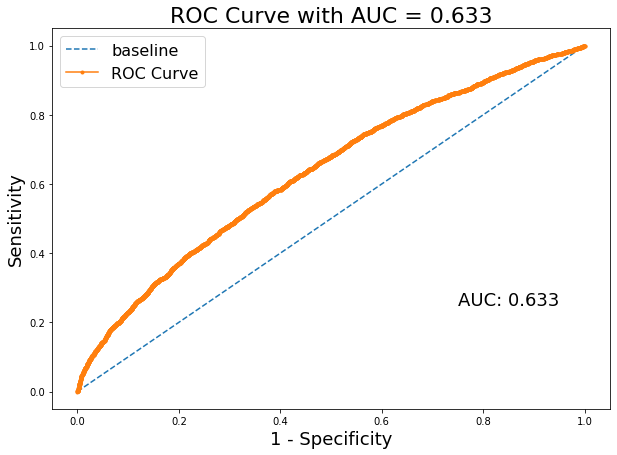


----------------------------------

Cross Validation 10K fold Result


**Cross validation Result Not avaible**

----------------------------------
The Model Parameters: 
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
evbiclas(reg)

## Decision Tree DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()


DecisionTreeClassifier
----------------------------------

Train Accuracy: 100.00

Test Accuracy: 57.90

Classification report:
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      5522
           1       0.51      0.50      0.51      4189

    accuracy                           0.58      9711
   macro avg       0.57      0.57      0.57      9711
weighted avg       0.58      0.58      0.58      9711


Confusion matrix:
                 Predicted Positive  Predicted Negative
Actual Positive                3526                1996
Actual Negative                2092                2097
----------------------------------

Sensitivity :  63.85
Specificity :  50.06

ROC / AUC:


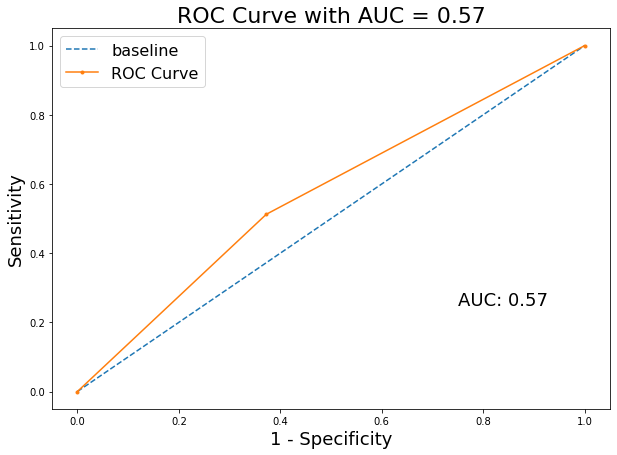


----------------------------------

Cross Validation 10K fold Result


**Cross validation Result Not avaible**

----------------------------------
The Model Parameters: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [ ]:
evbiclas(dt)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()


RandomForestClassifier
----------------------------------

Train Accuracy: 100.00

Test Accuracy: 66.30

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74      6959
           1       0.44      0.65      0.52      2752

    accuracy                           0.66      9711
   macro avg       0.63      0.66      0.63      9711
weighted avg       0.72      0.66      0.68      9711


Confusion matrix:
                 Predicted Positive  Predicted Negative
Actual Positive                4652                2307
Actual Negative                 966                1786
----------------------------------

Sensitivity :  66.85
Specificity :  64.90

ROC / AUC:


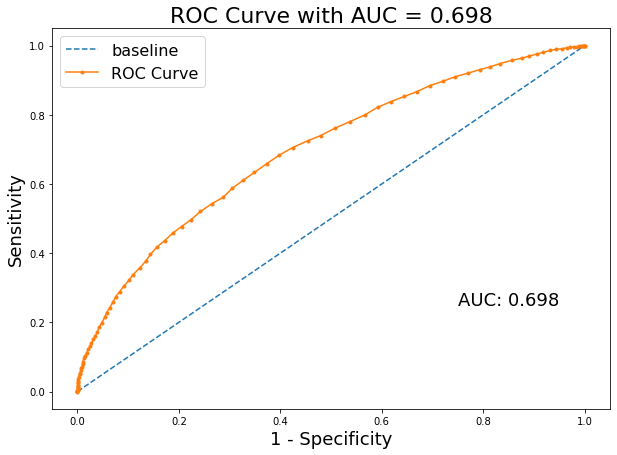


----------------------------------

Cross Validation 10K fold Result


**Cross validation Result Not avaible**

----------------------------------
The Model Parameters: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
evbiclas(rf)

## Gradient Boosting 

In [ ]:
import lightgbm as lgb
lb = lgb.LGBMClassifier()
lb.fit(X=X_train, y=y_train)

LGBMClassifier()


LGBMClassifier
----------------------------------

Train Accuracy: 71.47

Test Accuracy: 66.74

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.68      0.74      6786
           1       0.46      0.65      0.54      2925

    accuracy                           0.67      9711
   macro avg       0.64      0.66      0.64      9711
weighted avg       0.71      0.67      0.68      9711


Confusion matrix:
                 Predicted Positive  Predicted Negative
Actual Positive                4587                2199
Actual Negative                1031                1894
----------------------------------

Sensitivity :  67.60
Specificity :  64.75

ROC / AUC:


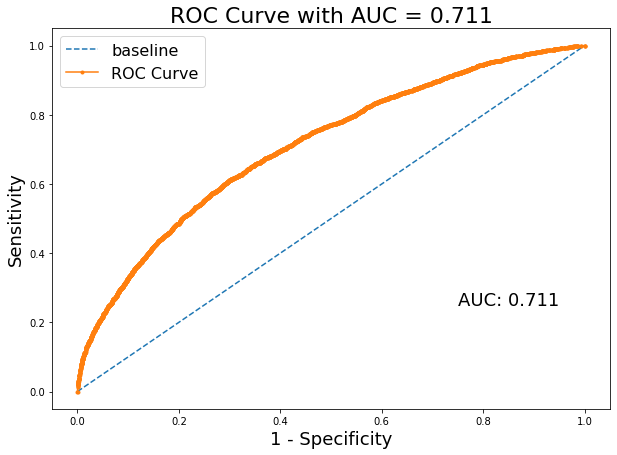


----------------------------------

Cross Validation 10K fold Result


**Cross validation Result Not avaible**

----------------------------------
The Model Parameters: 
 {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [ ]:
evbiclas(lb)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

Text(0.5, 0, '1 - Specificity')

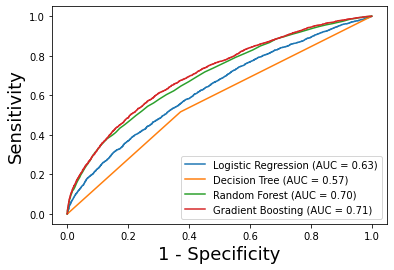

In [ ]:
from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(reg,X_test,y_test,name='Logistic Regression')
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_,name='Decision Tree');
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_,name='Random Forest');
plot_roc_curve(lb,X_test,y_test,ax=disp.ax_,name='Gradient Boosting');

plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)